# Defects/No-Defect Classification

In [ ]:
## Introduction 

## Background Study

## Aims and Objectives

## Data Source

## Procedure

## Conclusion

In [165]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [166]:
class_names = ['defects', 'no_defects']

In [167]:
def view_random_image(target_dir, target_class):
    """Display and return an image from a target directory for a specific class
        
        Parameters
        ----------
        target_dir: str
            The target directory to randomly select an image
        target_class: str
            The target class to select an image from i.e defects/no-defects
            
        Example
        -------
        img = view_random_image('data/processed/train', 'defects')
    """
    
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = load_img(target_folder + '/' + random_image[0], color_mode='grayscale')
    img = img_to_array(img)
    plt.imshow(img, cmap='gray')
    plt.title(target_class)
    plt.axis('off')

    print(f'Image shape: {img.shape}')
    return img

Image shape: (512, 512, 1)


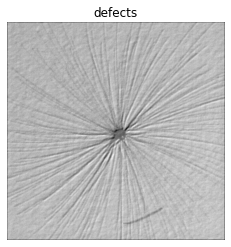

In [173]:
img = view_random_image('data/processed/train/', 'defects')

Image shape: (512, 512, 1)


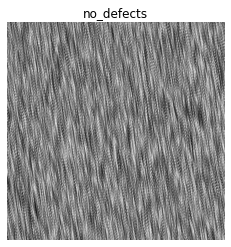

In [174]:
img = view_random_image('data/processed/train/', 'no_defects')

In [175]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [204]:
train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

# directories
train_dir = 'data/processed/train'
test_dir = 'data/processed/test'

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               color_mode='grayscale',
                                               shuffle=True,
                                                seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                             color_mode='grayscale',
                                               shuffle=True,
                                                seed=42)

Found 2025 images belonging to 2 classes.
Found 675 images belonging to 2 classes.


In [205]:
# build model

model_1 = tf.keras.models.Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(224, 224, 1)),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [206]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 64)      640       
                                                                 
 conv2d_14 (Conv2D)          (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 774400)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 774401    
                                                                 
Total params: 811,969
Trainable params: 811,969
Non-trainable params: 0
________________________________________________

In [207]:
model_1.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy', f1_m])

history_1 = model_1.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps=len(test_data))

Epoch 1/5
64/64 [==============================] - 958s 15s/step - loss: 0.8334 - accuracy: 0.6553 - f1_m: 0.7696 - val_loss: 0.6345 - val_accuracy: 0.6919 - val_f1_m: 0.8087
Epoch 2/5
64/64 [==============================] - 861s 13s/step - loss: 0.6015 - accuracy: 0.7240 - f1_m: 0.8263 - val_loss: 0.6133 - val_accuracy: 0.7081 - val_f1_m: 0.7807
Epoch 3/5
64/64 [==============================] - 864s 14s/step - loss: 0.5593 - accuracy: 0.7264 - f1_m: 0.8291 - val_loss: 0.5782 - val_accuracy: 0.7096 - val_f1_m: 0.8263
Epoch 4/5
64/64 [==============================] - 945s 15s/step - loss: 0.5567 - accuracy: 0.7264 - f1_m: 0.8269 - val_loss: 0.5824 - val_accuracy: 0.7096 - val_f1_m: 0.8276
Epoch 5/5
64/64 [==============================] - 1019s 16s/step - loss: 0.5392 - accuracy: 0.7269 - f1_m: 0.8249 - val_loss: 0.5732 - val_accuracy: 0.7081 - val_f1_m: 0.8167


In [ ]:
model_2 = tf.keras.models.Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(224, 224, 1)),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy', f1_m])

history_2 = model_1.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps=len(test_data))

In [181]:
def make_prediction(img):
    img = img / 255
    img_resize = tf.image.resize(img, size=[52, 52])
    img_expanded = tf.expand_dims(img_resize, axis=0)
    prediction = model_1.predict(img_expanded)
    plt.imshow(img, cmap='gray')
    plt.title(class_names[int(tf.round(prediction)[0])])

Image shape: (512, 512, 1)


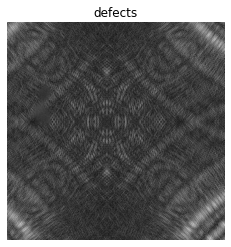

In [202]:
img = view_random_image('data/processed/test/', 'defects')

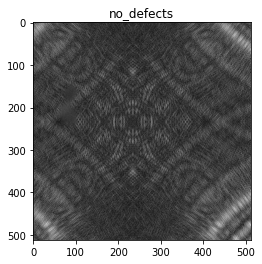

In [203]:
make_prediction(img)